In [89]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from collections import defaultdict

In [90]:
y_name = 'Light'
df1 = pd.read_csv('datatraining.txt', skipinitialspace=True, na_values='?', 
                 keep_default_na=True)
df2 =pd.read_csv('datatest.txt', skipinitialspace=True, na_values='?', 
                 keep_default_na=True)
df3=pd.read_csv('datatest2.txt', skipinitialspace=True, na_values='?', 
                 keep_default_na=True)
df4=pd.merge(df1, df2, how='outer')
df=pd.merge(df4, df3, how='outer')
df.shape


(20560, 7)

In [91]:
df['Day']=pd.to_datetime(df['date']).dt.day
df['Hour']=pd.to_datetime(df['date']).dt.hour
df['Month']=pd.to_datetime(df['date']).dt.month
df['Year']=pd.to_datetime(df['date']).dt.year
df['Data']=pd.to_datetime(df['date']).dt.normalize()
del df['date']

In [92]:
del df["Humidity"], df["HumidityRatio"], df["Day"], df["Month"], df["Hour"], df["CO2"], df["Year"], df["Data"], df["Occupancy"]
df.head()

,Temperature,Light
0,23.18,426.0
1,23.15,429.5
2,23.15,426.0
3,23.15,426.0
4,23.10,426.0


Data Partitioning

In [93]:
from sklearn.model_selection import train_test_split, cross_val_score 

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [94]:
attributes = [col for col in df.columns if col != y_name]
X = df[attributes].values
y = df[y_name]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

Linear Regression

In [95]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso

In [96]:
reg = LinearRegression()
reg.fit(X_train.T[0].reshape(-1, 1), y_train)
y_pred = reg.predict(X_test.T[0].reshape(-1, 1))

print('R2: %.3f' % r2_score(y_test, y_pred))
print('MSE: %.3f' % mean_squared_error(y_test, y_pred))
print('MAE: %.3f' % mean_absolute_error(y_test, y_pred))

R2: 0.456
MSE: 24635.560
MAE: 124.180


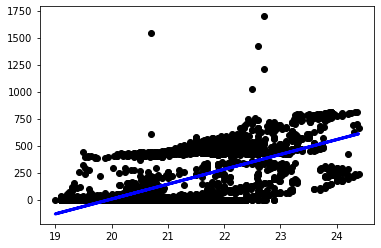

In [97]:
plt.scatter(X_test.T[0], y_test,  color='black')
plt.plot(X_test.T[0], y_pred, color='blue', linewidth=3)
plt.show()

LASSO

In [98]:
reg = Lasso()
reg.fit(X_train, y_train)
print('Coefficients: \n', reg.coef_)
print('Intercept: \n', reg.intercept_)

Coefficients: 
 [136.7404851]
Intercept: 
 -2729.296372214537


In [99]:
y_pred = reg.predict(X_test)
print('R2: %.3f' % r2_score(y_test, y_pred))
print('MSE: %.3f' % mean_squared_error(y_test, y_pred))
print('MAE: %.3f' % mean_absolute_error(y_test, y_pred))

R2: 0.456
MSE: 24634.252
MAE: 124.202


RIDGE

In [100]:
reg = Ridge()
reg.fit(X_train, y_train)
print('Coefficients: \n', reg.coef_)
print('Intercept: \n', reg.intercept_)

Coefficients: 
 [137.62869884]
Intercept: 
 -2747.861899328393


In [101]:
y_pred = reg.predict(X_test)
print('R2: %.3f' % r2_score(y_test, y_pred))
print('MSE: %.3f' % mean_squared_error(y_test, y_pred))
print('MAE: %.3f' % mean_absolute_error(y_test, y_pred))

R2: 0.456
MSE: 24635.539
MAE: 124.180
